In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
from keras import backend as K
np.random.seed(0)

Using TensorFlow backend.


In [0]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    if(len(dataset) ==2):
        dataX.append(dataset[0])
        dataY.append(dataset[1,0])
        return np.array(dataX), np.array(dataY)
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
df = pd.read_csv("sp500.csv")
df['caldt'] = pd.to_datetime(df['caldt'], format = '%Y%m%d')
df['caldt'] =  df['caldt'].dt.strftime('%Y-%m-%d')
data = df['spindx'].values
data = data.astype('float32')
data = np.reshape(data,(-1,1))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
pred = [] # at the end, append to prediction
num_hidden = 8
# Look back is how many lags do we want. so look back 1 in seq = (1 2 3 4 5) will produce (2 3 4 5 6)
look_back = 1
#df.head()

In [0]:
# Implementing the forward chaining method for LSTM
start = time.time()
for i in range(5,len(data) - 1):
    train, test = data[0:i,:], data[i:i+look_back+1,]
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(num_hidden,input_shape = (1, look_back)))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.fit(trainX,trainY, epochs = 3, batch_size = 1, verbose = 1)
    testPredict = model.predict(testX)
    # invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    pred.append(testPredict)
    K.clear_session()
end = time.time()

Epoch 1/3
3/3 [==============================] - 1s 201ms/step - loss: 7.2170e-04
Epoch 2/3
3/3 [==============================] - 0s 2ms/step - loss: 4.5634e-04
Epoch 3/3
3/3 [==============================] - 0s 2ms/step - loss: 2.6984e-04
Epoch 1/3
4/4 [==============================] - 1s 145ms/step - loss: 5.6985e-04
Epoch 2/3
4/4 [==============================] - 0s 2ms/step - loss: 2.6864e-04
Epoch 3/3
4/4 [==============================] - 0s 2ms/step - loss: 8.9014e-05
Epoch 1/3
5/5 [==============================] - 1s 119ms/step - loss: 5.7798e-04
Epoch 2/3
5/5 [==============================] - 0s 2ms/step - loss: 2.6675e-04
Epoch 3/3
5/5 [==============================] - 0s 2ms/step - loss: 7.8215e-05
Epoch 1/3
6/6 [==============================] - 1s 119ms/step - loss: 6.2879e-04
Epoch 2/3
6/6 [==============================] - 0s 2ms/step - loss: 2.0508e-04
Epoch 3/3
6/6 [==============================] - 0s 2ms/step - loss: 2.5807e-05
Epoch 1/3
7/7 [=================

Epoch 2/3
36/36 [==============================] - 0s 1ms/step - loss: 1.0558e-04
Epoch 3/3
36/36 [==============================] - 0s 2ms/step - loss: 1.0164e-04
Epoch 1/3
37/37 [==============================] - 1s 21ms/step - loss: 1.5113e-04
Epoch 2/3
37/37 [==============================] - 0s 2ms/step - loss: 1.0875e-04
Epoch 3/3
37/37 [==============================] - 0s 1ms/step - loss: 1.0383e-04
Epoch 1/3
38/38 [==============================] - 1s 20ms/step - loss: 1.5956e-04
Epoch 2/3
38/38 [==============================] - 0s 2ms/step - loss: 1.0875e-04
Epoch 3/3
38/38 [==============================] - 0s 1ms/step - loss: 1.0871e-04
Epoch 1/3
39/39 [==============================] - 1s 19ms/step - loss: 1.9539e-04
Epoch 2/3
39/39 [==============================] - 0s 1ms/step - loss: 1.6354e-04
Epoch 3/3
39/39 [==============================] - 0s 1ms/step - loss: 1.5784e-04
Epoch 1/3
40/40 [==============================] - 1s 16ms/step - loss: 2.6807e-04
Epoch 2/3
40

102/102 [==============================] - 0s 2ms/step - loss: 6.5285e-04
Epoch 3/3
102/102 [==============================] - 0s 2ms/step - loss: 6.0195e-04
Epoch 1/3
103/103 [==============================] - 1s 8ms/step - loss: 7.3757e-04
Epoch 2/3
103/103 [==============================] - 0s 1ms/step - loss: 5.3104e-04
Epoch 3/3
103/103 [==============================] - 0s 1ms/step - loss: 4.9087e-04
Epoch 1/3
104/104 [==============================] - 1s 8ms/step - loss: 7.4182e-04
Epoch 2/3
104/104 [==============================] - 0s 2ms/step - loss: 5.3899e-04
Epoch 3/3
104/104 [==============================] - 0s 1ms/step - loss: 4.9043e-04
Epoch 1/3
105/105 [==============================] - 1s 7ms/step - loss: 0.0011
Epoch 2/3
105/105 [==============================] - 0s 2ms/step - loss: 6.6862e-04A: 0s - loss: 7.1249e-0
Epoch 3/3
105/105 [==============================] - 0s 2ms/step - loss: 6.1630e-04
Epoch 1/3
106/106 [==============================] - 1s 8ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 1/3
168/168 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 2/3
168/168 [==============================] - 0s 2ms/step - loss: 6.3489e-04
Epoch 3/3
168/168 [==============================] - 0s 2ms/step - loss: 4.9894e-04
Epoch 1/3
169/169 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 2/3
169/169 [==============================] - 0s 1ms/step - loss: 6.6683e-04
Epoch 3/3
169/169 [==============================] - 0s 2ms/step - loss: 5.3601e-04
Epoch 1/3
170/170 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 2/3
170/170 [==============================] - 0s 2ms/step - loss: 8.0211e-04
Epoch 3/3
170/170 [==============================] - 0s 1ms/step - loss: 7.0131e-04
Epoch 1/3
171/171 [==============================] - 1s 5ms/step - loss: 0.0016
Epoch 2/3
171/171 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 3/3
171/171 [=======

233/233 [==============================] - 0s 2ms/step - loss: 7.6676e-04
Epoch 3/3
233/233 [==============================] - 0s 2ms/step - loss: 5.6803e-04
Epoch 1/3
234/234 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 2/3
234/234 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 3/3
234/234 [==============================] - 0s 2ms/step - loss: 8.1776e-04
Epoch 1/3
235/235 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 2/3
235/235 [==============================] - 0s 2ms/step - loss: 8.0455e-04
Epoch 3/3
235/235 [==============================] - 0s 2ms/step - loss: 5.7384e-04
Epoch 1/3
236/236 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 2/3
236/236 [==============================] - 0s 2ms/step - loss: 8.1605e-04
Epoch 3/3
236/236 [==============================] - 0s 2ms/step - loss: 6.0983e-04
Epoch 1/3
237/237 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 2/3
237/237 [===

299/299 [==============================] - 1s 2ms/step - loss: 7.2088e-04
Epoch 3/3
299/299 [==============================] - 1s 2ms/step - loss: 5.0772e-04
Epoch 1/3
300/300 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 5.4204e-04
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 3.3226e-04
Epoch 1/3
301/301 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 2/3
301/301 [==============================] - 1s 2ms/step - loss: 5.9804e-04
Epoch 3/3
301/301 [==============================] - 0s 2ms/step - loss: 3.7949e-04
Epoch 1/3
302/302 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 2/3
302/302 [==============================] - 1s 2ms/step - loss: 6.9202e-04
Epoch 3/3
302/302 [==============================] - 1s 2ms/step - loss: 4.8943e-04
Epoch 1/3
303/303 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 2/3
303/303 

Epoch 2/3
332/332 [==============================] - 1s 2ms/step - loss: 9.8574e-04A: 0s - loss: 0
Epoch 3/3
332/332 [==============================] - 1s 2ms/step - loss: 7.6276e-04
Epoch 1/3
333/333 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 2/3
333/333 [==============================] - 1s 2ms/step - loss: 7.1972e-04
Epoch 3/3
333/333 [==============================] - 1s 2ms/step - loss: 5.1512e-04
Epoch 1/3
334/334 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 2/3
334/334 [==============================] - 1s 2ms/step - loss: 8.3151e-04
Epoch 3/3
334/334 [==============================] - 1s 2ms/step - loss: 6.3784e-04
Epoch 1/3
335/335 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 2/3
335/335 [==============================] - 1s 2ms/step - loss: 6.6795e-04
Epoch 3/3
335/335 [==============================] - 1s 2ms/step - loss: 4.7254e-04
Epoch 1/3
336/336 [==============================] - 1s 3ms/step - loss: 

398/398 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 2/3
398/398 [==============================] - 1s 2ms/step - loss: 7.2440e-04
Epoch 3/3
398/398 [==============================] - 1s 2ms/step - loss: 4.2899e-04
Epoch 1/3
399/399 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 2/3
399/399 [==============================] - 1s 2ms/step - loss: 5.6993e-04
Epoch 3/3
399/399 [==============================] - 1s 2ms/step - loss: 2.7562e-04
Epoch 1/3
400/400 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 2/3
400/400 [==============================] - 1s 2ms/step - loss: 6.2699e-04
Epoch 3/3
400/400 [==============================] - 1s 2ms/step - loss: 3.2501e-04
Epoch 1/3
401/401 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 2/3
401/401 [==============================] - 1s 2ms/step - loss: 5.4919e-04
Epoch 3/3
401/401 [==============================] - 1s 2ms/step - loss: 2.6077e-04
Epoch 1/3
402/402 

464/464 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 2/3
464/464 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 3/3
464/464 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 1/3
465/465 [==============================] - 1s 3ms/step - loss: 0.0013
Epoch 2/3
465/465 [==============================] - 1s 2ms/step - loss: 4.1150e-04
Epoch 3/3
465/465 [==============================] - 1s 1ms/step - loss: 1.0044e-04
Epoch 1/3
466/466 [==============================] - 1s 3ms/step - loss: 0.0026
Epoch 2/3
466/466 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 3/3
466/466 [==============================] - 1s 2ms/step - loss: 8.1524e-04
Epoch 1/3
467/467 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 2/3
467/467 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 3/3
467/467 [==============================] - 1s 2ms/step - loss: 7.3943e-04
Epoch 1/3
468/468 [===============

497/497 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 3/3
497/497 [==============================] - 2s 3ms/step - loss: 7.0871e-04
Epoch 1/3
498/498 [==============================] - 2s 4ms/step - loss: 0.0029
Epoch 2/3
498/498 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 3/3
498/498 [==============================] - 1s 2ms/step - loss: 6.9234e-04
Epoch 1/3
499/499 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 2/3
499/499 [==============================] - 1s 2ms/step - loss: 4.7405e-04
Epoch 3/3
499/499 [==============================] - 1s 2ms/step - loss: 9.9261e-05
Epoch 1/3
500/500 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 2/3
500/500 [==============================] - 1s 2ms/step - loss: 8.1865e-04
Epoch 3/3
500/500 [==============================] - 1s 2ms/step - loss: 7.8031e-05
Epoch 1/3
501/501 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 2/3
501/501 [=======

Epoch 3/3
530/530 [==============================] - 1s 2ms/step - loss: 5.1998e-05
Epoch 1/3
531/531 [==============================] - 2s 4ms/step - loss: 0.0031
Epoch 2/3
531/531 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 3/3
531/531 [==============================] - 1s 2ms/step - loss: 2.3822e-04
Epoch 1/3
532/532 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 2/3
532/532 [==============================] - 1s 2ms/step - loss: 6.7730e-04
Epoch 3/3
532/532 [==============================] - 1s 2ms/step - loss: 1.3153e-04
Epoch 1/3
533/533 [==============================] - 2s 4ms/step - loss: 0.0025
Epoch 2/3
533/533 [==============================] - 1s 2ms/step - loss: 9.8908e-04
Epoch 3/3
533/533 [==============================] - 1s 2ms/step - loss: 2.8618e-04
Epoch 1/3
534/534 [==============================] - 2s 4ms/step - loss: 0.0026
Epoch 2/3
534/534 [==============================] - 1s 2ms/step - loss: 9.7632e-04
Epoch 3/3
53

596/596 [==============================] - 1s 2ms/step - loss: 1.1846e-04
Epoch 1/3
597/597 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 2/3
597/597 [==============================] - 1s 2ms/step - loss: 6.5527e-04
Epoch 3/3
597/597 [==============================] - 1s 2ms/step - loss: 7.2512e-05
Epoch 1/3
598/598 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 2/3
598/598 [==============================] - 1s 2ms/step - loss: 4.8136e-04
Epoch 3/3
598/598 [==============================] - 1s 2ms/step - loss: 6.0560e-05
Epoch 1/3
599/599 [==============================] - 2s 3ms/step - loss: 0.0041
Epoch 2/3
599/599 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 3/3
599/599 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 1/3
600/600 [==============================] - 2s 3ms/step - loss: 0.0034
Epoch 2/3
600/600 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 3/3
600/600 [===========

662/662 [==============================] - 1s 2ms/step - loss: 2.9270e-04
Epoch 1/3
663/663 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 2/3
663/663 [==============================] - 1s 2ms/step - loss: 0.0010
Epoch 3/3
663/663 [==============================] - 1s 2ms/step - loss: 2.8146e-04
Epoch 1/3
664/664 [==============================] - 2s 3ms/step - loss: 0.0028
Epoch 2/3
664/664 [==============================] - 1s 2ms/step - loss: 0.0010
Epoch 3/3
664/664 [==============================] - 1s 2ms/step - loss: 1.5213e-04
Epoch 1/3
665/665 [==============================] - 2s 3ms/step - loss: 0.0025
Epoch 2/3
665/665 [==============================] - 1s 2ms/step - loss: 5.5466e-04
Epoch 3/3
665/665 [==============================] - 1s 2ms/step - loss: 5.0129e-05
Epoch 1/3
666/666 [==============================] - 2s 3ms/step - loss: 0.0014
Epoch 2/3
666/666 [==============================] - 1s 2ms/step - loss: 2.9077e-04
Epoch 3/3
666/666 [=======

728/728 [==============================] - 1s 2ms/step - loss: 5.3129e-05
Epoch 1/3
729/729 [==============================] - 2s 2ms/step - loss: 0.0036
Epoch 2/3
729/729 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 3/3
729/729 [==============================] - 1s 2ms/step - loss: 3.2688e-04
Epoch 1/3
730/730 [==============================] - 2s 2ms/step - loss: 0.0018
Epoch 2/3
730/730 [==============================] - 1s 2ms/step - loss: 3.4242e-04
Epoch 3/3
730/730 [==============================] - 1s 2ms/step - loss: 5.0367e-05
Epoch 1/3
731/731 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 2/3
731/731 [==============================] - 1s 2ms/step - loss: 3.9474e-04
Epoch 3/3
731/731 [==============================] - 1s 2ms/step - loss: 5.4394e-05
Epoch 1/3
732/732 [==============================] - 2s 2ms/step - loss: 0.0033
Epoch 2/3
732/732 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 3/3
732/732 [=======

794/794 [==============================] - 1s 2ms/step - loss: 1.4101e-04
Epoch 1/3
795/795 [==============================] - 2s 2ms/step - loss: 0.0028
Epoch 2/3
795/795 [==============================] - 1s 2ms/step - loss: 8.3475e-04
Epoch 3/3
795/795 [==============================] - 1s 1ms/step - loss: 1.1564e-04
Epoch 1/3
796/796 [==============================] - 2s 2ms/step - loss: 0.0030
Epoch 2/3
796/796 [==============================] - 1s 2ms/step - loss: 6.2010e-04
Epoch 3/3
796/796 [==============================] - 1s 2ms/step - loss: 4.6437e-05
Epoch 1/3
797/797 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 2/3
797/797 [==============================] - 1s 2ms/step - loss: 1.3119e-04
Epoch 3/3
797/797 [==============================] - 1s 2ms/step - loss: 4.1964e-05
Epoch 1/3
798/798 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 2/3
798/798 [==============================] - 1s 1ms/step - loss: 3.2395e-04
Epoch 3/3
798/798 

Epoch 3/3
827/827 [==============================] - 1s 2ms/step - loss: 9.7350e-05
Epoch 1/3
828/828 [==============================] - 2s 2ms/step - loss: 0.0026
Epoch 2/3
828/828 [==============================] - 1s 1ms/step - loss: 5.5478e-04
Epoch 3/3
828/828 [==============================] - 1s 1ms/step - loss: 6.3124e-05
Epoch 1/3
829/829 [==============================] - 2s 2ms/step - loss: 0.0030
Epoch 2/3
829/829 [==============================] - 1s 1ms/step - loss: 6.5806e-04
Epoch 3/3
829/829 [==============================] - 1s 1ms/step - loss: 8.4040e-05
Epoch 1/3
830/830 [==============================] - 2s 2ms/step - loss: 0.0035
Epoch 2/3
830/830 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 3/3
830/830 [==============================] - 1s 2ms/step - loss: 1.3518e-04
Epoch 1/3
831/831 [==============================] - 2s 2ms/step - loss: 0.0034
Epoch 2/3
831/831 [==============================] - 1s 2ms/step - loss: 5.3619e-04
Epoch 3/3
83

893/893 [==============================] - 2s 2ms/step - loss: 3.9721e-05
Epoch 1/3
894/894 [==============================] - ETA: 0s - loss: 0.002 - 2s 3ms/step - loss: 0.0023
Epoch 2/3
894/894 [==============================] - 2s 2ms/step - loss: 2.6181e-04
Epoch 3/3
894/894 [==============================] - 2s 2ms/step - loss: 3.9164e-05
Epoch 1/3
895/895 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 2/3
895/895 [==============================] - 2s 2ms/step - loss: 2.8482e-04
Epoch 3/3
895/895 [==============================] - 1s 2ms/step - loss: 3.8644e-05
Epoch 1/3
896/896 [==============================] - 2s 2ms/step - loss: 0.0020
Epoch 2/3
896/896 [==============================] - 1s 2ms/step - loss: 1.6345e-04
Epoch 3/3
896/896 [==============================] - 2s 2ms/step - loss: 3.8895e-05
Epoch 1/3
897/897 [==============================] - 3s 3ms/step - loss: 0.0032
Epoch 2/3
897/897 [==============================] - 2s 2ms/step - loss: 6.468

Epoch 3/3
926/926 [==============================] - 2s 2ms/step - loss: 3.8830e-05
Epoch 1/3
927/927 [==============================] - 2s 2ms/step - loss: 0.0026
Epoch 2/3
927/927 [==============================] - 2s 2ms/step - loss: 1.5840e-04
Epoch 3/3
927/927 [==============================] - 2s 2ms/step - loss: 3.9855e-05
Epoch 1/3
928/928 [==============================] - 2s 2ms/step - loss: 0.0022
Epoch 2/3
928/928 [==============================] - 2s 2ms/step - loss: 2.3550e-04
Epoch 3/3
928/928 [==============================] - 2s 2ms/step - loss: 3.9116e-05
Epoch 1/3
929/929 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 2/3
929/929 [==============================] - 2s 2ms/step - loss: 1.5137e-04
Epoch 3/3
929/929 [==============================] - 2s 2ms/step - loss: 3.7931e-05
Epoch 1/3
930/930 [==============================] - 2s 2ms/step - loss: 0.0026
Epoch 2/3
930/930 [==============================] - 2s 3ms/step - loss: 3.4598e-04
Epoch 3/

992/992 [==============================] - 2s 2ms/step - loss: 7.4646e-05
Epoch 1/3
993/993 [==============================] - 2s 2ms/step - loss: 0.0028
Epoch 2/3
993/993 [==============================] - 2s 2ms/step - loss: 1.8880e-04
Epoch 3/3
993/993 [==============================] - 3s 3ms/step - loss: 3.6680e-05
Epoch 1/3
994/994 [==============================] - 4s 4ms/step - loss: 0.0040
Epoch 2/3
994/994 [==============================] - 2s 2ms/step - loss: 6.1942e-04
Epoch 3/3
994/994 [==============================] - 2s 2ms/step - loss: 4.6179e-05
Epoch 1/3
995/995 [==============================] - 3s 3ms/step - loss: 0.0028
Epoch 2/3
995/995 [==============================] - 2s 2ms/step - loss: 1.6122e-04
Epoch 3/3
995/995 [==============================] - 2s 2ms/step - loss: 3.8270e-05
Epoch 1/3
996/996 [==============================] - 2s 2ms/step - loss: 0.0045
Epoch 2/3
996/996 [==============================] - 2s 2ms/step - loss: 6.7408e-04
Epoch 3/3
996/996 

1057/1057 [==============================] - 3s 3ms/step - loss: 0.0043
Epoch 2/3
1057/1057 [==============================] - 2s 2ms/step - loss: 3.7860e-04
Epoch 3/3
1057/1057 [==============================] - 2s 2ms/step - loss: 3.9715e-05
Epoch 1/3
1058/1058 [==============================] - 3s 3ms/step - loss: 0.0053
Epoch 2/3
1058/1058 [==============================] - 2s 2ms/step - loss: 7.0487e-04
Epoch 3/3
1058/1058 [==============================] - 2s 2ms/step - loss: 4.1307e-05
Epoch 1/3
1059/1059 [==============================] - 3s 3ms/step - loss: 0.0026
Epoch 2/3
1059/1059 [==============================] - 2s 2ms/step - loss: 5.5375e-05
Epoch 3/3
1059/1059 [==============================] - 2s 2ms/step - loss: 3.9368e-05
Epoch 1/3
1060/1060 [==============================] - 3s 3ms/step - loss: 0.0034
Epoch 2/3
1060/1060 [==============================] - 2s 2ms/step - loss: 2.2344e-04
Epoch 3/3
1060/1060 [==============================] - 2s 2ms/step - loss: 4.093

1121/1121 [==============================] - 3s 3ms/step - loss: 0.0033
Epoch 2/3
1121/1121 [==============================] - 2s 2ms/step - loss: 1.0198e-04
Epoch 3/3
1121/1121 [==============================] - 2s 2ms/step - loss: 4.0475e-05
Epoch 1/3
1122/1122 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 2/3
1122/1122 [==============================] - 2s 2ms/step - loss: 2.5547e-04
Epoch 3/3
1122/1122 [==============================] - 2s 2ms/step - loss: 3.8383e-05
Epoch 1/3
1123/1123 [==============================] - 3s 2ms/step - loss: 0.0028
Epoch 2/3
1123/1123 [==============================] - 2s 2ms/step - loss: 8.6272e-05
Epoch 3/3
1123/1123 [==============================] - 2s 2ms/step - loss: 4.0265e-05
Epoch 1/3
1124/1124 [==============================] - 3s 2ms/step - loss: 0.0064
Epoch 2/3
1124/1124 [==============================] - 2s 2ms/step - loss: 6.7051e-04
Epoch 3/3
1124/1124 [==============================] - 2s 2ms/step - loss: 4.408

1153/1153 [==============================] - 2s 2ms/step - loss: 1.1322e-04
Epoch 3/3
1153/1153 [==============================] - 2s 2ms/step - loss: 3.7702e-05
Epoch 1/3
1154/1154 [==============================] - 3s 2ms/step - loss: 0.0037
Epoch 2/3
1154/1154 [==============================] - 2s 2ms/step - loss: 9.2633e-05
Epoch 3/3
1154/1154 [==============================] - 2s 2ms/step - loss: 4.3489e-05
Epoch 1/3
1155/1155 [==============================] - 3s 2ms/step - loss: 0.0075
Epoch 2/3
1155/1155 [==============================] - 2s 2ms/step - loss: 2.0147e-04
Epoch 3/3
1155/1155 [==============================] - 2s 2ms/step - loss: 3.7448e-05
Epoch 1/3
1156/1156 [==============================] - 3s 2ms/step - loss: 0.0035
Epoch 2/3
1156/1156 [==============================] - 2s 2ms/step - loss: 8.0248e-05
Epoch 3/3
1156/1156 [==============================] - 2s 2ms/step - loss: 3.7181e-05
Epoch 1/3
1157/1157 [==============================] - 3s 3ms/step - loss: 0

1217/1217 [==============================] - 2s 2ms/step - loss: 4.8552e-04
Epoch 3/3
1217/1217 [==============================] - 2s 2ms/step - loss: 4.1855e-05
Epoch 1/3
1218/1218 [==============================] - 3s 2ms/step - loss: 0.0060
Epoch 2/3
1218/1218 [==============================] - 2s 2ms/step - loss: 1.7637e-04
Epoch 3/3
1218/1218 [==============================] - 2s 2ms/step - loss: 4.2274e-05
Epoch 1/3
1219/1219 [==============================] - 3s 2ms/step - loss: 0.0047
Epoch 2/3
1219/1219 [==============================] - 2s 2ms/step - loss: 9.1748e-05
Epoch 3/3
1219/1219 [==============================] - 2s 2ms/step - loss: 4.1156e-05
Epoch 1/3
1220/1220 [==============================] - 3s 2ms/step - loss: 0.0036
Epoch 2/3
1220/1220 [==============================] - 2s 2ms/step - loss: 5.9357e-05
Epoch 3/3
1220/1220 [==============================] - 2s 2ms/step - loss: 4.2850e-05
Epoch 1/3
1221/1221 [==============================] - 3s 2ms/step - loss: 0

Epoch 3/3
1249/1249 [==============================] - 2s 2ms/step - loss: 3.8511e-05
Epoch 1/3
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0088
Epoch 2/3
1250/1250 [==============================] - 2s 2ms/step - loss: 1.1604e-04
Epoch 3/3
1250/1250 [==============================] - 2s 2ms/step - loss: 4.4019e-05
Epoch 1/3
1251/1251 [==============================] - 3s 2ms/step - loss: 0.0098
Epoch 2/3
1251/1251 [==============================] - 2s 2ms/step - loss: 4.4596e-04
Epoch 3/3
1251/1251 [==============================] - 2s 2ms/step - loss: 4.4382e-05
Epoch 1/3
1252/1252 [==============================] - 3s 2ms/step - loss: 0.0114
Epoch 2/3
1252/1252 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 3/3
1252/1252 [==============================] - 2s 2ms/step - loss: 4.9692e-05
Epoch 1/3
1253/1253 [==============================] - 3s 2ms/step - loss: 0.0101
Epoch 2/3
1253/1253 [==============================] - 2s 2ms/step - loss:

1313/1313 [==============================] - 2s 2ms/step - loss: 4.6629e-05
Epoch 1/3
1314/1314 [==============================] - 3s 2ms/step - loss: 0.0070
Epoch 2/3
1314/1314 [==============================] - 2s 2ms/step - loss: 1.5855e-04
Epoch 3/3
1314/1314 [==============================] - 3s 2ms/step - loss: 4.8465e-05
Epoch 1/3
1315/1315 [==============================] - 3s 3ms/step - loss: 0.0039
Epoch 2/3
1315/1315 [==============================] - 3s 2ms/step - loss: 4.2252e-05
Epoch 3/3
1315/1315 [==============================] - 2s 2ms/step - loss: 4.0675e-05
Epoch 1/3
1316/1316 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 2/3
1316/1316 [==============================] - 3s 2ms/step - loss: 1.1544e-04
Epoch 3/3
1316/1316 [==============================] - 3s 2ms/step - loss: 4.7949e-05
Epoch 1/3
1317/1317 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 2/3
1317/1317 [==============================] - 3s 2ms/step - loss: 4.757

1377/1377 [==============================] - 3s 2ms/step - loss: 4.1818e-05
Epoch 1/3
1378/1378 [==============================] - 4s 3ms/step - loss: 0.0088
Epoch 2/3
1378/1378 [==============================] - 3s 2ms/step - loss: 7.2423e-05
Epoch 3/3
1378/1378 [==============================] - 3s 2ms/step - loss: 4.4708e-05
Epoch 1/3
1379/1379 [==============================] - 3s 2ms/step - loss: 0.0095
Epoch 2/3
1379/1379 [==============================] - 3s 2ms/step - loss: 1.4804e-04
Epoch 3/3
1379/1379 [==============================] - 3s 2ms/step - loss: 4.4018e-05
Epoch 1/3
1380/1380 [==============================] - 3s 2ms/step - loss: 0.0112
Epoch 2/3
1380/1380 [==============================] - 3s 2ms/step - loss: 5.9486e-04
Epoch 3/3
1380/1380 [==============================] - 3s 2ms/step - loss: 4.9912e-05
Epoch 1/3
1381/1381 [==============================] - 3s 2ms/step - loss: 0.0095
Epoch 2/3
1381/1381 [==============================] - 3s 2ms/step - loss: 1.511

1441/1441 [==============================] - 2s 2ms/step - loss: 5.0565e-05
Epoch 1/3
1442/1442 [==============================] - 3s 2ms/step - loss: 0.0114
Epoch 2/3
1442/1442 [==============================] - 3s 2ms/step - loss: 7.0573e-05
Epoch 3/3
1442/1442 [==============================] - 2s 2ms/step - loss: 4.9656e-05
Epoch 1/3
1443/1443 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 2/3
1443/1443 [==============================] - 2s 2ms/step - loss: 3.8709e-05
Epoch 3/3
1443/1443 [==============================] - 2s 2ms/step - loss: 3.8831e-05
Epoch 1/3
1444/1444 [==============================] - 3s 2ms/step - loss: 0.0100
Epoch 2/3
1444/1444 [==============================] - 2s 2ms/step - loss: 1.2060e-04
Epoch 3/3
1444/1444 [==============================] - 2s 2ms/step - loss: 5.5548e-05
Epoch 1/3
1445/1445 [==============================] - 3s 2ms/step - loss: 0.0141
Epoch 2/3
1445/1445 [==============================] - 2s 2ms/step - loss: 5.049

1505/1505 [==============================] - 3s 2ms/step - loss: 5.0336e-05
Epoch 1/3
1506/1506 [==============================] - 3s 2ms/step - loss: 0.0050
Epoch 2/3
1506/1506 [==============================] - 2s 2ms/step - loss: 5.3481e-05
Epoch 3/3
1506/1506 [==============================] - 3s 2ms/step - loss: 5.2933e-05
Epoch 1/3
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0112
Epoch 2/3
1507/1507 [==============================] - 3s 2ms/step - loss: 1.0456e-04
Epoch 3/3
1507/1507 [==============================] - 3s 2ms/step - loss: 5.5912e-05
Epoch 1/3
1508/1508 [==============================] - 3s 2ms/step - loss: 0.0126
Epoch 2/3
1508/1508 [==============================] - 3s 2ms/step - loss: 1.0633e-04
Epoch 3/3
1508/1508 [==============================] - 3s 2ms/step - loss: 5.4139e-05
Epoch 1/3
1509/1509 [==============================] - 3s 2ms/step - loss: 0.0169
Epoch 2/3
1509/1509 [==============================] - 3s 2ms/step - loss: 9.414

1569/1569 [==============================] - 3s 2ms/step - loss: 5.2196e-05
Epoch 1/3
1570/1570 [==============================] - 3s 2ms/step - loss: 0.0109
Epoch 2/3
1570/1570 [==============================] - 3s 2ms/step - loss: 6.5063e-05
Epoch 3/3
1570/1570 [==============================] - 3s 2ms/step - loss: 6.0109e-05
Epoch 1/3
1571/1571 [==============================] - 3s 2ms/step - loss: 0.0108
Epoch 2/3
1571/1571 [==============================] - 3s 2ms/step - loss: 8.0982e-05
Epoch 3/3
1571/1571 [==============================] - 3s 2ms/step - loss: 6.6298e-05
Epoch 1/3
1572/1572 [==============================] - 3s 2ms/step - loss: 0.0121
Epoch 2/3
1572/1572 [==============================] - 3s 2ms/step - loss: 8.4810e-05
Epoch 3/3
1572/1572 [==============================] - 3s 2ms/step - loss: 4.9618e-05
Epoch 1/3
1573/1573 [==============================] - 3s 2ms/step - loss: 0.0100
Epoch 2/3
1573/1573 [==============================] - 3s 2ms/step - loss: 7.571

1633/1633 [==============================] - 4s 2ms/step - loss: 4.9616e-05
Epoch 1/3
1634/1634 [==============================] - 4s 3ms/step - loss: 0.0081
Epoch 2/3
1634/1634 [==============================] - 4s 2ms/step - loss: 5.8341e-05
Epoch 3/3
1634/1634 [==============================] - 4s 2ms/step - loss: 5.5864e-05
Epoch 1/3
1635/1635 [==============================] - 4s 2ms/step - loss: 0.0104
Epoch 2/3
1635/1635 [==============================] - 3s 2ms/step - loss: 7.5940e-05A: 0s - loss: 7.6504e-
Epoch 3/3
1635/1635 [==============================] - 3s 2ms/step - loss: 6.7255e-05
Epoch 1/3
1636/1636 [==============================] - 4s 2ms/step - loss: 0.0082
Epoch 2/3
1636/1636 [==============================] - 3s 2ms/step - loss: 4.9333e-05
Epoch 3/3
1636/1636 [==============================] - 3s 2ms/step - loss: 4.8696e-05
Epoch 1/3
1637/1637 [==============================] - 4s 2ms/step - loss: 0.0064
Epoch 2/3
1637/1637 [==============================] - 3s 

1697/1697 [==============================] - 3s 2ms/step - loss: 5.9421e-05
Epoch 1/3
1698/1698 [==============================] - 4s 2ms/step - loss: 0.0064
Epoch 2/3
1698/1698 [==============================] - 3s 2ms/step - loss: 6.5616e-05
Epoch 3/3
1698/1698 [==============================] - 3s 2ms/step - loss: 6.1654e-05
Epoch 1/3
1699/1699 [==============================] - 4s 2ms/step - loss: 0.0070
Epoch 2/3
1699/1699 [==============================] - 3s 2ms/step - loss: 5.6565e-05
Epoch 3/3
1699/1699 [==============================] - 3s 2ms/step - loss: 5.6915e-05
Epoch 1/3
1700/1700 [==============================] - 4s 2ms/step - loss: 0.0078
Epoch 2/3
1700/1700 [==============================] - 3s 2ms/step - loss: 6.3370e-05
Epoch 3/3
1700/1700 [==============================] - 3s 2ms/step - loss: 6.0472e-05
Epoch 1/3
1701/1701 [==============================] - 4s 2ms/step - loss: 0.0104
Epoch 2/3
1701/1701 [==============================] - 3s 2ms/step - loss: 5.602

1761/1761 [==============================] - 3s 2ms/step - loss: 5.2735e-05
Epoch 1/3
1762/1762 [==============================] - 4s 2ms/step - loss: 0.0074
Epoch 2/3
1762/1762 [==============================] - 3s 2ms/step - loss: 5.9625e-05
Epoch 3/3
1762/1762 [==============================] - 3s 2ms/step - loss: 5.9455e-05
Epoch 1/3
1763/1763 [==============================] - 4s 2ms/step - loss: 0.0098
Epoch 2/3
1763/1763 [==============================] - 3s 2ms/step - loss: 5.9508e-05
Epoch 3/3
1763/1763 [==============================] - 3s 2ms/step - loss: 5.5172e-05
Epoch 1/3
1764/1764 [==============================] - 4s 2ms/step - loss: 0.0166
Epoch 2/3
1764/1764 [==============================] - 3s 2ms/step - loss: 6.5851e-05
Epoch 3/3
1764/1764 [==============================] - 3s 2ms/step - loss: 5.2654e-05
Epoch 1/3
1765/1765 [==============================] - 4s 2ms/step - loss: 0.0106
Epoch 2/3
1765/1765 [==============================] - 3s 2ms/step - loss: 6.056

1825/1825 [==============================] - 3s 2ms/step - loss: 6.0643e-05
Epoch 1/3
1826/1826 [==============================] - 4s 2ms/step - loss: 0.0123
Epoch 2/3
1826/1826 [==============================] - 3s 2ms/step - loss: 7.8232e-05
Epoch 3/3
1826/1826 [==============================] - 3s 2ms/step - loss: 6.4874e-05
Epoch 1/3
1827/1827 [==============================] - 3s 2ms/step - loss: 0.0074
Epoch 2/3
1827/1827 [==============================] - 3s 2ms/step - loss: 7.1835e-05
Epoch 3/3
1827/1827 [==============================] - 3s 2ms/step - loss: 6.8135e-05
Epoch 1/3
1828/1828 [==============================] - 3s 2ms/step - loss: 0.0115
Epoch 2/3
1828/1828 [==============================] - 3s 1ms/step - loss: 6.4619e-05
Epoch 3/3
1828/1828 [==============================] - 3s 2ms/step - loss: 6.0538e-05
Epoch 1/3
1829/1829 [==============================] - 4s 2ms/step - loss: 0.0083
Epoch 2/3
1829/1829 [==============================] - 3s 2ms/step - loss: 5.687

1889/1889 [==============================] - 3s 2ms/step - loss: 5.6675e-05
Epoch 1/3
1890/1890 [==============================] - 4s 2ms/step - loss: 0.0068
Epoch 2/3
1890/1890 [==============================] - 3s 2ms/step - loss: 4.7858e-05
Epoch 3/3
1890/1890 [==============================] - 3s 2ms/step - loss: 5.0827e-05
Epoch 1/3
1891/1891 [==============================] - 4s 2ms/step - loss: 0.0071
Epoch 2/3
1891/1891 [==============================] - 3s 2ms/step - loss: 5.2107e-05
Epoch 3/3
1891/1891 [==============================] - 3s 2ms/step - loss: 5.1419e-05
Epoch 1/3
1892/1892 [==============================] - 4s 2ms/step - loss: 0.0078
Epoch 2/3
1892/1892 [==============================] - 3s 2ms/step - loss: 5.9703e-05
Epoch 3/3
1892/1892 [==============================] - 3s 2ms/step - loss: 5.6810e-05
Epoch 1/3
1893/1893 [==============================] - 3s 2ms/step - loss: 0.0155
Epoch 2/3
1893/1893 [==============================] - 3s 2ms/step - loss: 9.867

1953/1953 [==============================] - 3s 2ms/step - loss: 7.6600e-05
Epoch 1/3
1954/1954 [==============================] - 3s 2ms/step - loss: 0.0123
Epoch 2/3
1954/1954 [==============================] - 3s 2ms/step - loss: 5.6373e-05
Epoch 3/3
1954/1954 [==============================] - 3s 2ms/step - loss: 5.5078e-05
Epoch 1/3
1955/1955 [==============================] - 4s 2ms/step - loss: 0.0101
Epoch 2/3
1955/1955 [==============================] - 3s 2ms/step - loss: 6.4040e-05
Epoch 3/3
1955/1955 [==============================] - 3s 2ms/step - loss: 6.2392e-05
Epoch 1/3
1956/1956 [==============================] - 4s 2ms/step - loss: 0.0131
Epoch 2/3
1956/1956 [==============================] - 3s 2ms/step - loss: 6.4179e-05
Epoch 3/3
1956/1956 [==============================] - 3s 2ms/step - loss: 5.7738e-05
Epoch 1/3
1957/1957 [==============================] - 4s 2ms/step - loss: 0.0088
Epoch 2/3
1957/1957 [==============================] - 3s 2ms/step - loss: 7.734

2017/2017 [==============================] - 3s 2ms/step - loss: 6.1971e-05
Epoch 1/3
2018/2018 [==============================] - 4s 2ms/step - loss: 0.0166
Epoch 2/3
2018/2018 [==============================] - 3s 2ms/step - loss: 6.6905e-05
Epoch 3/3
2018/2018 [==============================] - 3s 2ms/step - loss: 5.7548e-05
Epoch 1/3
2019/2019 [==============================] - 4s 2ms/step - loss: 0.0112
Epoch 2/3
2019/2019 [==============================] - 3s 2ms/step - loss: 7.9532e-05
Epoch 3/3
2019/2019 [==============================] - 3s 2ms/step - loss: 7.0346e-05
Epoch 1/3
2020/2020 [==============================] - 4s 2ms/step - loss: 0.0096
Epoch 2/3
2020/2020 [==============================] - 3s 2ms/step - loss: 7.0986e-05
Epoch 3/3
2020/2020 [==============================] - 3s 2ms/step - loss: 6.3834e-05
Epoch 1/3
2021/2021 [==============================] - 4s 2ms/step - loss: 0.0120
Epoch 2/3
2021/2021 [==============================] - 3s 2ms/step - loss: 7.369

2081/2081 [==============================] - 5s 3ms/step - loss: 6.0765e-05
Epoch 1/3
2082/2082 [==============================] - 5s 2ms/step - loss: 0.0071
Epoch 2/3
2082/2082 [==============================] - 4s 2ms/step - loss: 6.5309e-05
Epoch 3/3
2082/2082 [==============================] - 4s 2ms/step - loss: 5.9839e-05
Epoch 1/3
2083/2083 [==============================] - 4s 2ms/step - loss: 0.0058
Epoch 2/3
2083/2083 [==============================] - 4s 2ms/step - loss: 6.9562e-05
Epoch 3/3
2083/2083 [==============================] - 4s 2ms/step - loss: 6.0871e-05
Epoch 1/3
2084/2084 [==============================] - 4s 2ms/step - loss: 0.0203
Epoch 2/3
2084/2084 [==============================] - 4s 2ms/step - loss: 1.0749e-04
Epoch 3/3
2084/2084 [==============================] - 4s 2ms/step - loss: 8.1246e-05
Epoch 1/3
2085/2085 [==============================] - 4s 2ms/step - loss: 0.0060
Epoch 2/3
2085/2085 [==============================] - 4s 2ms/step - loss: 9.391

2145/2145 [==============================] - 4s 2ms/step - loss: 4.7801e-05
Epoch 1/3
2146/2146 [==============================] - 5s 2ms/step - loss: 0.0155
Epoch 2/3
2146/2146 [==============================] - 4s 2ms/step - loss: 9.9848e-05
Epoch 3/3
2146/2146 [==============================] - 4s 2ms/step - loss: 7.9256e-05
Epoch 1/3
2147/2147 [==============================] - 5s 2ms/step - loss: 0.0136
Epoch 2/3
2147/2147 [==============================] - 4s 2ms/step - loss: 1.0581e-04
Epoch 3/3
2147/2147 [==============================] - 4s 2ms/step - loss: 8.2767e-05
Epoch 1/3
2148/2148 [==============================] - 5s 2ms/step - loss: 0.0119
Epoch 2/3
2148/2148 [==============================] - 4s 2ms/step - loss: 5.8219e-05
Epoch 3/3
2148/2148 [==============================] - 4s 2ms/step - loss: 5.4321e-05
Epoch 1/3
2149/2149 [==============================] - 5s 2ms/step - loss: 0.0168
Epoch 2/3
2149/2149 [==============================] - 4s 2ms/step - loss: 6.588

2209/2209 [==============================] - 4s 2ms/step - loss: 5.3500e-05
Epoch 1/3
2210/2210 [==============================] - 5s 2ms/step - loss: 0.0119
Epoch 2/3
2210/2210 [==============================] - 4s 2ms/step - loss: 6.9167e-05
Epoch 3/3
2210/2210 [==============================] - 4s 2ms/step - loss: 5.9186e-05
Epoch 1/3
2211/2211 [==============================] - 5s 2ms/step - loss: 0.0098
Epoch 2/3
2211/2211 [==============================] - 5s 2ms/step - loss: 6.0216e-05
Epoch 3/3
2211/2211 [==============================] - 5s 2ms/step - loss: 5.6241e-05
Epoch 1/3
2212/2212 [==============================] - 6s 3ms/step - loss: 0.0212
Epoch 2/3
2212/2212 [==============================] - 4s 2ms/step - loss: 7.2538e-05
Epoch 3/3
2212/2212 [==============================] - 4s 2ms/step - loss: 6.2253e-05
Epoch 1/3
2213/2213 [==============================] - 5s 2ms/step - loss: 0.0093
Epoch 2/3
2213/2213 [==============================] - 5s 2ms/step - loss: 8.559

2273/2273 [==============================] - 4s 2ms/step - loss: 5.4797e-05
Epoch 1/3
2274/2274 [==============================] - 5s 2ms/step - loss: 0.0163
Epoch 2/3
2274/2274 [==============================] - 5s 2ms/step - loss: 7.4462e-05
Epoch 3/3
2274/2274 [==============================] - 4s 2ms/step - loss: 6.1420e-05
Epoch 1/3
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0096
Epoch 2/3
2275/2275 [==============================] - 4s 2ms/step - loss: 6.0578e-05
Epoch 3/3
2275/2275 [==============================] - 4s 2ms/step - loss: 5.9258e-05
Epoch 1/3
2276/2276 [==============================] - 5s 2ms/step - loss: 0.0156
Epoch 2/3
2276/2276 [==============================] - 4s 2ms/step - loss: 8.0223e-05
Epoch 3/3
2276/2276 [==============================] - 4s 2ms/step - loss: 6.5193e-05
Epoch 1/3
2277/2277 [==============================] - 5s 2ms/step - loss: 0.0119
Epoch 2/3
2277/2277 [==============================] - 4s 2ms/step - loss: 6.037

2337/2337 [==============================] - 5s 2ms/step - loss: 7.2825e-05
Epoch 1/3
2338/2338 [==============================] - 6s 3ms/step - loss: 0.0073
Epoch 2/3
2338/2338 [==============================] - 5s 2ms/step - loss: 5.8684e-05
Epoch 3/3
2338/2338 [==============================] - 5s 2ms/step - loss: 5.6747e-05
Epoch 1/3
2339/2339 [==============================] - 6s 3ms/step - loss: 0.0157
Epoch 2/3
2339/2339 [==============================] - 5s 2ms/step - loss: 6.6396e-05
Epoch 3/3
2339/2339 [==============================] - 5s 2ms/step - loss: 5.6200e-05
Epoch 1/3
2340/2340 [==============================] - 6s 3ms/step - loss: 0.0147
Epoch 2/3
2340/2340 [==============================] - 5s 2ms/step - loss: 7.7339e-05
Epoch 3/3
2340/2340 [==============================] - 5s 2ms/step - loss: 6.0525e-05
Epoch 1/3
2341/2341 [==============================] - 6s 3ms/step - loss: 0.0173
Epoch 2/3
2341/2341 [==============================] - 5s 2ms/step - loss: 5.507

2401/2401 [==============================] - 4s 2ms/step - loss: 6.4959e-05
Epoch 1/3
2402/2402 [==============================] - 5s 2ms/step - loss: 0.0131
Epoch 2/3
2402/2402 [==============================] - 5s 2ms/step - loss: 5.9270e-05
Epoch 3/3
2402/2402 [==============================] - 4s 2ms/step - loss: 6.2783e-05
Epoch 1/3
2403/2403 [==============================] - 5s 2ms/step - loss: 0.0180
Epoch 2/3
2403/2403 [==============================] - 5s 2ms/step - loss: 6.1540e-05
Epoch 3/3
2403/2403 [==============================] - 4s 2ms/step - loss: 6.3226e-05
Epoch 1/3
2404/2404 [==============================] - 5s 2ms/step - loss: 0.0162
Epoch 2/3
2404/2404 [==============================] - 6s 2ms/step - loss: 5.5153e-05
Epoch 3/3
2404/2404 [==============================] - 6s 2ms/step - loss: 5.8800e-05
Epoch 1/3
2405/2405 [==============================] - 5s 2ms/step - loss: 0.0100
Epoch 2/3
2405/2405 [==============================] - 4s 2ms/step - loss: 8.214

2465/2465 [==============================] - 4s 2ms/step - loss: 6.9474e-05
Epoch 1/3
2466/2466 [==============================] - 5s 2ms/step - loss: 0.0168
Epoch 2/3
2466/2466 [==============================] - 4s 2ms/step - loss: 8.6797e-05
Epoch 3/3
2466/2466 [==============================] - 4s 2ms/step - loss: 6.3965e-05
Epoch 1/3
2467/2467 [==============================] - 5s 2ms/step - loss: 0.0147
Epoch 2/3
2467/2467 [==============================] - 4s 2ms/step - loss: 8.6989e-05
Epoch 3/3
2467/2467 [==============================] - 5s 2ms/step - loss: 7.1245e-05
Epoch 1/3
2468/2468 [==============================] - 5s 2ms/step - loss: 0.0158
Epoch 2/3
2468/2468 [==============================] - 4s 2ms/step - loss: 7.0272e-05
Epoch 3/3
2468/2468 [==============================] - 4s 2ms/step - loss: 6.7430e-05
Epoch 1/3
2469/2469 [==============================] - 5s 2ms/step - loss: 0.0149
Epoch 2/3
2469/2469 [==============================] - 4s 2ms/step - loss: 8.538

2529/2529 [==============================] - 5s 2ms/step - loss: 6.7517e-05
Epoch 1/3
2530/2530 [==============================] - 6s 2ms/step - loss: 0.0193
Epoch 2/3
2530/2530 [==============================] - 5s 2ms/step - loss: 1.0567e-04
Epoch 3/3
2530/2530 [==============================] - 5s 2ms/step - loss: 7.6058e-05
Epoch 1/3
2531/2531 [==============================] - 6s 2ms/step - loss: 0.0135
Epoch 2/3
2531/2531 [==============================] - 5s 2ms/step - loss: 8.9732e-05
Epoch 3/3
2531/2531 [==============================] - 5s 2ms/step - loss: 7.2027e-05
Epoch 1/3
2532/2532 [==============================] - 6s 2ms/step - loss: 0.0154
Epoch 2/3
2532/2532 [==============================] - 5s 2ms/step - loss: 1.2855e-04
Epoch 3/3
2532/2532 [==============================] - 5s 2ms/step - loss: 8.1873e-05
Epoch 1/3
2533/2533 [==============================] - 6s 2ms/step - loss: 0.0118
Epoch 2/3
2533/2533 [==============================] - 5s 2ms/step - loss: 9.017

2593/2593 [==============================] - 4s 2ms/step - loss: 7.2431e-05
Epoch 1/3
2594/2594 [==============================] - 5s 2ms/step - loss: 0.0136
Epoch 2/3
2594/2594 [==============================] - 4s 2ms/step - loss: 1.3229e-04
Epoch 3/3
2594/2594 [==============================] - 4s 2ms/step - loss: 8.7235e-05
Epoch 1/3
2595/2595 [==============================] - 5s 2ms/step - loss: 0.0197
Epoch 2/3
2595/2595 [==============================] - 4s 2ms/step - loss: 9.5371e-05
Epoch 3/3
2595/2595 [==============================] - 4s 2ms/step - loss: 7.4258e-05
Epoch 1/3
2596/2596 [==============================] - 5s 2ms/step - loss: 0.0185
Epoch 2/3
2596/2596 [==============================] - 4s 2ms/step - loss: 1.1059e-04
Epoch 3/3
2596/2596 [==============================] - 4s 2ms/step - loss: 7.5307e-05
Epoch 1/3
2597/2597 [==============================] - 5s 2ms/step - loss: 0.0202
Epoch 2/3
2597/2597 [==============================] - 4s 2ms/step - loss: 1.445

2657/2657 [==============================] - 4s 2ms/step - loss: 7.2832e-05
Epoch 1/3
2658/2658 [==============================] - 5s 2ms/step - loss: 0.0215
Epoch 2/3
2658/2658 [==============================] - 5s 2ms/step - loss: 7.7408e-05
Epoch 3/3
2658/2658 [==============================] - 4s 2ms/step - loss: 8.1155e-05
Epoch 1/3
2659/2659 [==============================] - 5s 2ms/step - loss: 0.0191
Epoch 2/3
2659/2659 [==============================] - 5s 2ms/step - loss: 7.4651e-05
Epoch 3/3
2659/2659 [==============================] - 4s 2ms/step - loss: 7.3636e-05
Epoch 1/3
2660/2660 [==============================] - 5s 2ms/step - loss: 0.0336
Epoch 2/3
2660/2660 [==============================] - 5s 2ms/step - loss: 2.3944e-04
Epoch 3/3
2660/2660 [==============================] - 5s 2ms/step - loss: 1.3374e-04
Epoch 1/3
2661/2661 [==============================] - 5s 2ms/step - loss: 0.0117
Epoch 2/3
2661/2661 [==============================] - 5s 2ms/step - loss: 1.490

In [0]:
print(end - start)

23661.891478538513


In [0]:
last = []
last.append(testY)
last = np.array(last)
last = np.reshape(last, (last.shape[0], 1, last.shape[1]))
testPredict = model.predict(last)
pred.append(scaler.inverse_transform(testPredict))

In [0]:
predicted = pd.DataFrame(np.reshape(pred,(-1,1)))
predicted.to_csv('Predicted5.csv')

In [0]:
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[5:len(data)]), np.reshape(pred,(-1,1))))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 28.87 RMSE


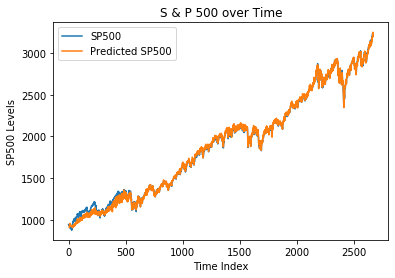

In [0]:
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[5+(look_back*2)-2:len(data), :] = np.reshape(pred,(-1,1))
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data),label = "SP500")
plt.plot(testPredictPlot, label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
plt.title("S & P 500 over Time")
#plt.savefig('sp500_plt5.png')

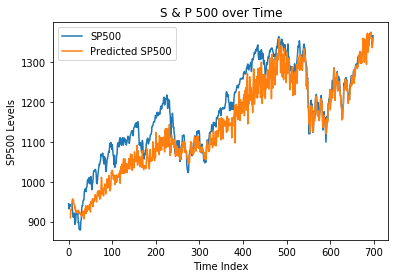

In [0]:
plt.plot(scaler.inverse_transform(data)[1:700],label = "SP500")
plt.plot(testPredictPlot[1:700], label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
plt.title("S & P 500 over Time")
plt.show()
#plt.savefig('zoomed in first 700.png')

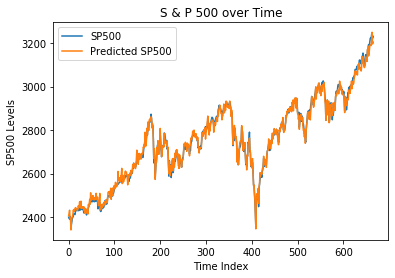

In [0]:
plt.plot(scaler.inverse_transform(data)[2000:],label = "SP500")
plt.plot(testPredictPlot[2000:], label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
plt.title("S & P 500 over Time")
plt.show()
#plt.savefig("last600.png")

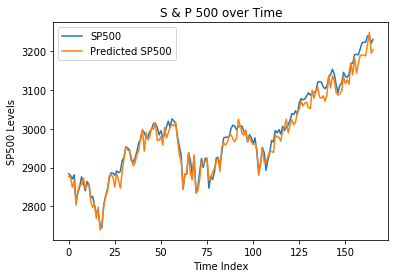

In [0]:
plt.plot(scaler.inverse_transform(data)[2500:],label = "SP500")
plt.plot(testPredictPlot[2500:], label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
plt.title("S & P 500 over Time")
plt.show()
#plt.savefig('last160.png')

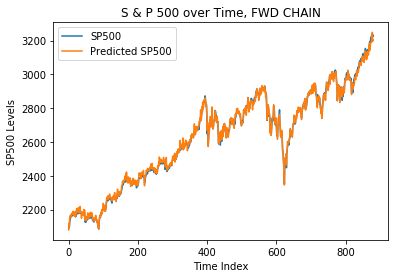

In [0]:
plt.plot(scaler.inverse_transform(data)[1786:],label = "SP500")
plt.plot(testPredictPlot[1786:], label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
plt.title("S & P 500 over Time, FWD CHAIN")
plt.show()
#plt.savefig('sametest set.png')

In [0]:
testScore = math.sqrt(mean_squared_error(scaler.inverse_transform(data[1791:len(data)]), np.reshape(pred[1786:],(-1,1))))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 15.36 RMSE


In [0]:
plt.plot(scaler.inverse_transform(data)[1000:2000],label = "SP500")
plt.plot(testPredictPlot[1000:2000], label = "Predicted SP500")
plt.ylabel('SP500 Levels')
plt.xlabel('Time Index')
plt.legend()
plt.title("S & P 500 over Time")
plt.show()

NameError: name 'scaler' is not defined